<a href="https://colab.research.google.com/github/gitcnk/Logistic_Regression/blob/main/Logistic_Regression_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
library(dplyr)
library(ggplot2)

mydata <- read.csv('https://academics.hamilton.edu/mathematics/ckuruwit/Data/breastcancer2.csv',
                    stringsAsFactors = TRUE)
                    # use stringsAsFactors to properly read character variables into R

Here is the link if you'd like to read more about this dataset:

---

https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [22]:
names(mydata)
head(mydata)

[1] "status"            "radius"            "texture"          
 [4] "perimeter"         "area"              "smoothness"       
 [7] "compactness"       "concavity"         "concave.points"   
[10] "symmetry"          "fractal.dimension"

,status,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613


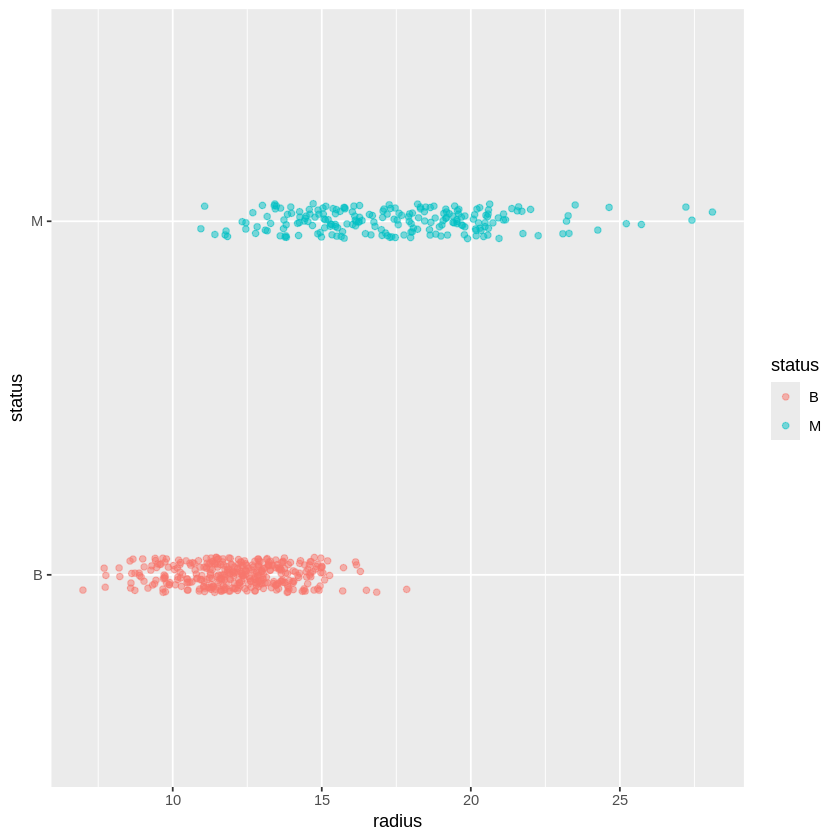

In [23]:
# Suppose we are interested in building a model with the
# radius variabele.  Explore how this variable associated with malignancy

mydata %>%
ggplot() +
  aes( x = radius, y = status, col = status) +
  geom_jitter(height = 0.05, width = 0.01, alpha = 0.5)




1.   Add the logistic regression curve onto the plot.
2.   Find the equation of the fitted curve.
3. **(Bonus)** Add the eqation of the fitted line into plot.  
*Hint:* Use GPT for help :)



In [26]:
# Recode the status variable into 1's and 0's

mydata$cancer_status <- recode(mydata$status , 'M' = 1, 'B' = 0)

table(mydata$status)
table(mydata$cancer_status)



  B   M 
357 212 


  0   1 
357 212 

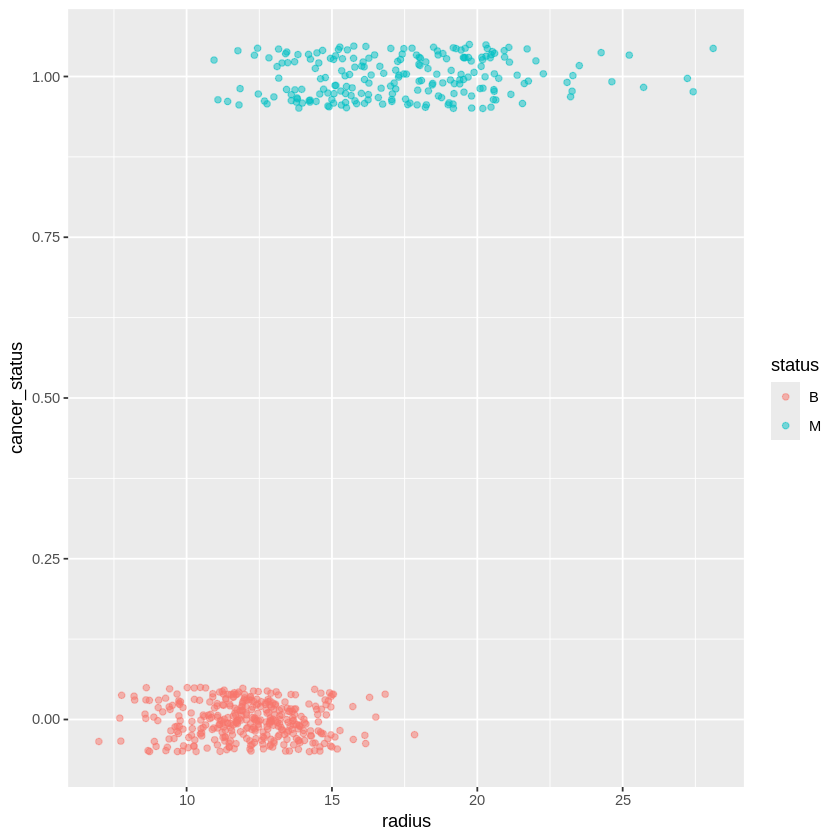

In [27]:
mydata %>%
ggplot() +
  aes( x = radius, y = cancer_status) +
  geom_jitter(aes(col = status), height = 0.05, width = 0.01, alpha = 0.5)


`geom_smooth()` using formula = 'y ~ x'


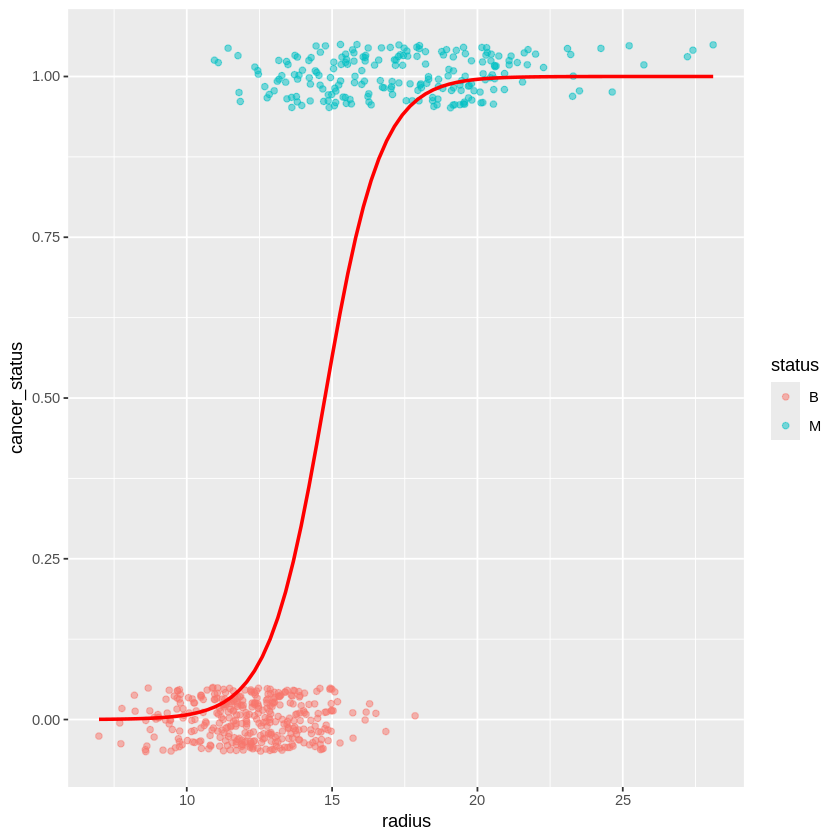

In [30]:
# prompt: can you add the logistic regression curve into my plot and col the curve in red


mydata %>%
  ggplot() +
  aes(x = radius, y = cancer_status) +
  geom_jitter(aes(col = status), height = 0.05, width = 0.01, alpha = 0.5) +
  geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE, color = "red")

In [31]:
mymodel <- glm(cancer_status ~ radius, data = mydata, family = binomial)
summary(mymodel)



Call:
glm(formula = cancer_status ~ radius, family = binomial, data = mydata)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -15.24587    1.32463  -11.51   <2e-16 ***
radius        1.03359    0.09311   11.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 751.44  on 568  degrees of freedom
Residual deviance: 330.01  on 567  degrees of freedom
AIC: 334.01

Number of Fisher Scoring iterations: 6


Fitted curve:

$ \hat p = \frac{e^{-15.2 + 1.03radius}}{1 + e^{-15.2 + 1.03radius}}$

where $\hat p$ is the predicted probability from this model.




How to interpret the 'slope'?

- First, ackowledge the sign if the 'slope' parameter.  In this case, the positive sign of the 'slope' indicates that probility increase as we move from small to large radius values.

- In order to think about rate of change in probability we need to make some judgements on the x values we use.

In [35]:
mynewdata <- data.frame(radius = c(14,15, 20,21))

mypredictions <- predict(mymodel, newdata = mynewdata, type = 'response')

mypredictions

1         2         3         4 
0.3152631 0.5641351 0.9956182 0.9984369

In [36]:
mydata %>%
  summarise(mean(radius), sd(radius))

mean(radius),sd(radius)
<dbl>,<dbl>
14.12729,3.524049


Unfortunately, we cannot have a single statement about the 'slope' because it is not constant (it varies).